In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import collections
import numpy as np
from scipy import stats
from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 1.1 Data Selection

In [3]:
data = pd.read_csv(PATH+'backup/complete_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
#data

Attributes AccountsPayable                                    \
Symbol                 BDX       GL     IBM     NSC      PEP   
2021-03                NaN      NaN   4.140  1.0430  18.0200   
2020-12                NaN      NaN   4.908  0.5520   8.8530   
2020-09            1.35500      NaN   3.985  1.2730  19.3200   
2020-06                NaN      NaN   4.719  1.2680  17.2200   
2020-03                NaN      NaN   4.172  1.2840  16.2000   
2019-12                NaN      NaN   4.896  0.7100   8.0130   
2019-09            1.09200      NaN   4.042  1.4070  17.2100   
2019-06                NaN      NaN   4.724  1.4070  16.4600   
2019-03                NaN      NaN   5.711  1.3340  15.8000   
2018-12                NaN      NaN   6.558  0.8280   7.2130   
2018-09            1.10600      NaN   5.384  1.3940  15.2300   
2018-06                NaN      NaN   5.518  1.3230  14.6000   
2018-03                NaN      NaN   5.736  1.2170  14.2800   
2017-12                NaN      NaN   6.451  0.8220   6.7270   
2017-09            0.79700      NaN   5.442  1.2870  14.6400   
2017-06                NaN      NaN   5.126  1.2230  13.8300   
2017-03                NaN      NaN   5.324  1.2110  13.0700   
2016-12                NaN      NaN   6.209  0.6500   6.1580   
2016-09            0.66500      NaN   5.271  1.1310  14.3000   
2016-06                NaN      NaN   5.484  1.0850  13.6800   
2016-03                NaN      NaN   5.302  1.1190  12.8200   
2015-12                NaN      NaN   6.028  0.6020   5.5460   
2015-09            0.63100      NaN   5.166  1.1600  13.5500   
2015-06                NaN      NaN   5.943  1.1440  13.1600   
2015-03                NaN      NaN   6.314  1.0940  12.1600   
2014-12                NaN      NaN   6.864  0.7480   5.1270   
2014-09            0.40100      NaN   5.855  1.3870  13.5900   
2014-06                NaN      NaN   6.271  1.2450  12.9900   
2014-03                NaN      NaN   6.865  1.1940  11.6200   
2013-12                NaN      NaN   7.461  0.6850   4.8740   
2013-09            0.33300      NaN   6.263  1.2670  12.2100   
2013-06                NaN      NaN   6.821  1.1800  12.1000   
2013-03                NaN      NaN   7.203  1.1880  11.2400   
2012-12                NaN      NaN   7.952  0.7770   4.4510   
2012-09            0.35000  0.23618   7.085  1.2600  11.7200   
2012-06                NaN  0.22165   7.482  1.1260  11.1500   
2012-03                NaN  0.24119   7.416  1.2430  11.1800   
2011-12                NaN      NaN   8.517  0.4990   4.0830   
2011-09            0.30484  0.22716   7.093  1.3290  11.5200   
2011-06                NaN  0.21113   7.112  1.2540  11.4300   
2011-03                NaN  0.22907   6.747  1.0930  10.2400   
2010-12                NaN  0.22160   7.804  1.1810   3.8650   
2010-09            0.32540      NaN   7.084  1.1310  10.7000   
2010-06                NaN      NaN   7.233  1.0640   9.8430   
2010-03                NaN      NaN   6.345  0.9870   9.5530   
2009-12                NaN      NaN   7.436  0.9740   8.1270   
2009-09            0.26418      NaN   6.145  0.9800   8.1410   
2009-06                NaN      NaN   5.869  0.9450   7.7720   
2009-03                NaN      NaN   5.878  0.9520   7.5560   
2008-12            1.22900      NaN   7.014  1.1400   8.2730   
2008-09            0.26088      NaN   6.770  1.2250   8.0110   
2008-06            1.26200      NaN   7.531  1.1140   7.9860   
2008-03            1.17100      NaN   7.329  1.3370   7.3860   
2007-12            1.28900      NaN   8.054  1.1390   7.6020   
2007-09            0.26699      NaN   6.732  1.1270   7.2910   
2007-06            1.20900      NaN   6.653  1.1580   6.8700   
2007-03            1.13800      NaN   6.859  1.0840   6.2070   
2006-12                NaN      NaN   7.964  1.1810   2.1020   
2006-09            0.24360      NaN  22.250  1.1680   6.4980   
2006-06            1.05800      NaN  22.400  1.1150   6.1840   
2006-03            0.98130      

In [4]:
#included_dates = pd.date_range(start='1985-03-01', end='2021-01-01', freq='Q').strftime('%Y-%m')
included_dates = pd.date_range(start='1985-03-01', end='2021-04-01', freq='Q').strftime('%Y-%m')
data.drop(list( set(data.index) - set(included_dates) ), axis=0, inplace=True)
#data

In [5]:
include = ['P/E', 'PEG', 'FCF', 'P/FCF', 'P/S', 'P/B', 'ROE', 'EPSBasic', 'EBIT', 'TotalLiabilities']
include += ['EPSDiluted', 'EPSDiluted(TTM)', 'CashfromOperations', 'CashfromOperations(TTM)', 'NetChangeinCapitalExpenditures', 'NetChangeinCapitalExpenditures(TTM)', 'Revenue', 'Revenue(TTM)', 'NetIncome', 'NetIncome(TTM)', 'PricePerShare', 'TotalAssets', 'TotalLiabilities', 'AverageBasicSharesOutstanding', ]
data.drop(list(set(data.columns.get_level_values(0)) - set(include)), level=0, axis=1, inplace=True)
#data

In [6]:
stk_miss = pd.Series(dtype='int64')
for stock in set(data.columns.get_level_values(1)):
    stk_miss[stock] = data.xs(stock, level=1, axis=1).isnull().sum().sum()
stk_miss.sort_values(ascending=True)

GL     193
NSC    196
PEP    214
BDX    223
IBM    245
dtype: int64

In [7]:
# NSC - INDUSTRIAL
# GL - FINANCIAL
# PEP - CONSUMER
# BDX - HEALTH CARE
# IBM - INFORMATION/TECH

In [12]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data.drop(list(set(data.columns.get_level_values(1)) - set(stock_sel)), axis=1, level=1, inplace=True)

KeyError: 'labels [] not found in level'

In [7]:
for stock in stock_sel:
    data['Prediction', stock] = data['PricePerShare', stock].shift(1)
data

NameError: name 'stock_sel' is not defined

In [10]:
#for stock in stock_sel:
#    data['QMonth', stock] = pd.DatetimeIndex(list(data.index)).strftime('%m')
#data

In [19]:
data.to_csv(PATH+'manual_features_dataset.csv')

## 1.2 Data Analysis

In [8]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data = pd.read_csv(PATH+'manual_features_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

Attributes AverageBasicSharesOutstanding                                    \
Symbol                               BDX       GL      IBM      NSC    PEP   
2021-03                          0.29110  0.10348  0.89360  0.25140  1.380   
2020-12                          0.29059  0.10443  0.89259  0.25330  1.379   
2020-09                          0.29043  0.10615  0.89140  0.25460  1.384   
2020-06                          0.28238  0.10644  0.88944  0.25540  1.387   
2020-03                          0.27201  0.10729  0.88800  0.25730  1.390   
2019-12                          0.27110  0.10811  0.88704  0.25940  1.393   
2019-09                          0.27062  0.10881  0.88600  0.26210  1.397   
2019-06                          0.27025  0.10965  0.88627  0.26480  1.401   
2019-03                          0.26988  0.11030  0.88960  0.26710  1.406   
2018-12                          0.26904  0.11139  0.90139  0.27050  1.409   
2018-09                          0.26861  0.11259  0.91120  0.27550  1.414   
2018-06                          0.26784  0.11335  0.91510  0.28130  1.417   
2018-03                          0.26734  0.11418  0.92068  0.28350  1.420   
2017-12                          0.23004  0.11505  0.92451  0.28520  1.419   
2017-09                          0.22832  0.11592  0.92944  0.28710  1.425   
2017-06                          0.22081  0.11665  0.93492  0.28900  1.428   
2017-03                          0.21358  0.11777  0.94244  0.29030  1.428   
2016-12                          0.21306  0.11857  0.94861  0.29090  1.427   
2016-09                          0.21358  0.11948  0.95400  0.29270  1.438   
2016-06                          0.21308  0.12048  0.95740  0.29470  1.443   
2016-03                          0.21247  0.12148  0.96170  0.29720  1.446   
2015-12                          0.21169  0.12301  0.96958  0.30010  1.451   
2015-09                          0.21108  0.12446  0.97510  0.30010  1.467   
2015-06                          0.21018  0.12582  0.98230  0.30290  1.476   
2015-03                          0.19608  0.12712  0.98810  0.30680  1.484   
2014-12                          0.19284  0.12830  0.99039  0.30910  1.491   
2014-09                          0.19232  0.12997  0.99180  0.30940  1.507   
2014-06                          0.19305  0.13149  0.99960  0.30950  1.515   
2014-03                          0.19361  0.13316  1.03500  0.30950  1.524   
2013-12                          0.19420  0.13506  1.07300  0.30860  1.529   
2013-09                          0.19469  0.13690  1.09100  0.31040  1.542   
2013-06                          0.19488  0.13829  1.10100  0.31410  1.548   
2013-03                          0.19461  0.14037  1.11400  0.31450  1.544   
2012-12                          0.19643  0.14159  1.12500  0.31490  1.542   
2012-09                          0.19902  0.14269  1.13700  0.31770  1.556   
2012-06                          0.20202  0.14534  1.14900  0.32270  1.563   
2012-03                          0.20643  0.15010  1.15900  0.32830  1.568   
2011-12                          0.21430  0.15195  1.17200  0.33260  1.561   
2011-09                          0.21668  0.15717  1.18900  0.34320  1.578   
2011-06                          0.21897  0.16652  1.20500  0.35100  1.583   
2011-03                          0.22089  0.17523  1.22200  0.35520  1.583   
2010-12                          0.22808  0.17942  1.24000  0.36050  1.581   
2010-09                          0.23136  0.18175  1.25500  0.36630  1.588   
2010-06                          0.23324  0.27681  1.27900  0.36970  1.608   
2010-03                          0.23532  0.18640  1.30100  0.36950  1.582   
2009-12                          0.23736  0.18628  1.31800  0.36800  1.561   
2009-09                          0.23915  0.18618  1.32000  0.36730  1.558   
2009-06                          0.24011  0.18615  1.32600  0.36680  1.557   
2009-03                          0.24024  0.18872  1.34400  0.36620  1.555   
2008-12               

In [9]:
include = ['P/E', 'PEG', 'FCF', 'P/FCF', 'P/S', 'P/B', 'ROE', 'EPSBasic', 'EBIT', 'TotalLiabilities', 'PricePerShare', 'Prediction', 'QMonth']
#include += ['EPSDiluted', 'EPSDiluted(TTM)', 'CashfromOperations', 'CashfromOperations(TTM)', 'NetChangeinCapitalExpenditures', 'NetChangeinCapitalExpenditures(TTM)', 'Revenue', 'Revenue(TTM)', 'NetIncome', 'NetIncome(TTM)', 'PricePerShare', 'TotalAssets', 'TotalLiabilities', 'AverageBasicSharesOutstanding', ]
data.drop(list(set(data.columns.get_level_values(0)) - set(include)), level=0, axis=1, inplace=True)

In [10]:
data.shape

(145, 60)

In [15]:
data.xs('IBM', level=1, axis=1).shape

(144, 12)

In [16]:
data.xs('IBM', level=1, axis=1).dtypes

Attributes
EBIT                float64
EPSBasic            float64
FCF                 float64
P/B                 float64
P/E                 float64
P/FCF               float64
P/S                 float64
PEG                 float64
PricePerShare       float64
ROE                 float64
TotalLiabilities    float64
Prediction          float64
dtype: object

In [17]:
# Number of na values per stock
stk_miss = pd.Series(dtype='int64')
for stock in set(data.columns.get_level_values(1)):
    stk_miss[stock] = data.xs(stock, level=1, axis=1).isnull().sum().sum()
stk_miss.sort_values(ascending=True)

NSC     98
PEP    111
GL     114
BDX    119
IBM    132
dtype: int64

In [18]:
# Number of na values per feature
att_miss = pd.Series(dtype='int64')
for att in set(data.columns.get_level_values(0)):
    att_miss[att] = data.xs(att, level=0, axis=1).isnull().sum().sum()
att_miss.sort_values(ascending=True)

P/S                   0
PricePerShare         0
Prediction            5
EPSBasic              9
EBIT                 17
P/E                  18
PEG                  54
P/B                  69
TotalLiabilities     69
ROE                 109
P/FCF               112
FCF                 112
dtype: int64

In [19]:
# Number of na values per time period
quarters = list(data.index)
q_miss = pd.Series(dtype='int64')
for quarter in quarters:
    q_miss[quarter] = data.loc[quarter].isnull().sum().sum()
q_miss.sort_index(ascending=True)

1985-03    31
1985-06    31
1985-09    31
1985-12    25
1986-03    28
1986-06    26
1986-09    27
1986-12    25
1987-03    27
1987-06    26
1987-09    27
1987-12    24
1988-03    28
1988-06    26
1988-09    26
1988-12    24
1989-03    24
1989-06    21
1989-09    19
1989-12    17
1990-03    12
1990-06    14
1990-09    11
1990-12     2
1991-03     2
1991-06     1
1991-09     1
1991-12     1
1992-03     0
1992-06     0
1992-09     0
1992-12     0
1993-03     0
1993-06     0
1993-09     0
1993-12     0
1994-03     0
1994-06     0
1994-09     0
1994-12     0
1995-03     0
1995-06     0
1995-09     0
1995-12     0
1996-03     0
1996-06     0
1996-09     0
1996-12     0
1997-03     0
1997-06     0
1997-09     0
1997-12     0
1998-03     0
1998-06     0
1998-09     0
1998-12     0
1999-03     0
1999-06     0
1999-09     0
1999-12     0
2000-03     0
2000-06     0
2000-09     0
2000-12     1
2001-03     0
2001-06     0
2001-09     0
2001-12     0
2002-03     0
2002-06     0
2002-09     0
2002-1

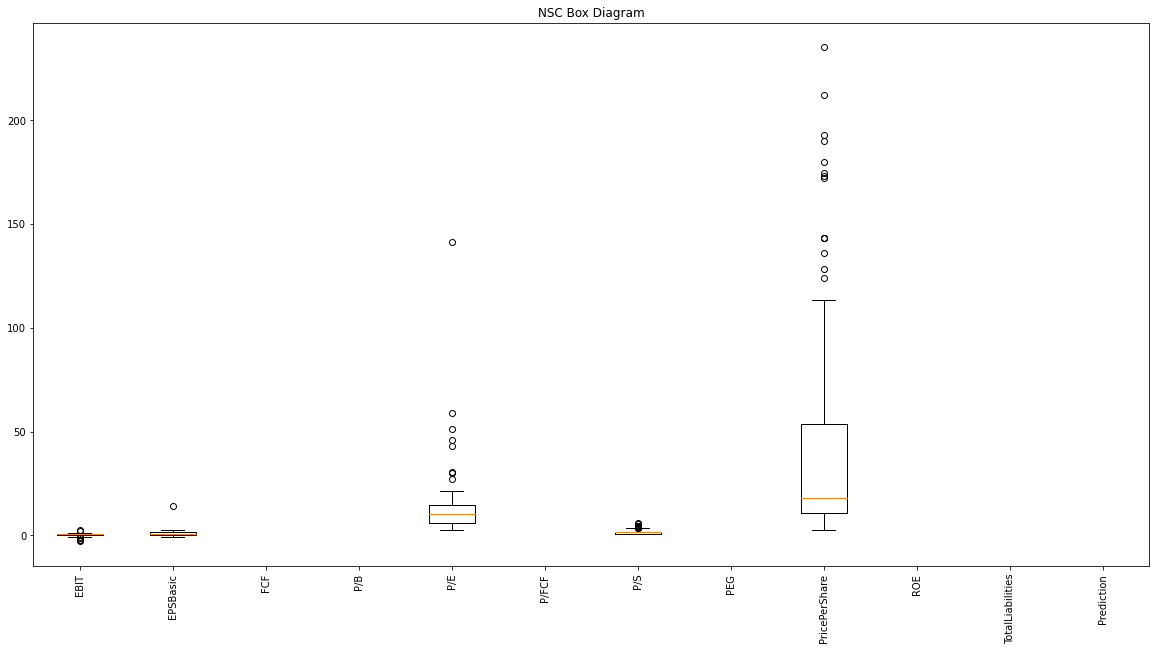

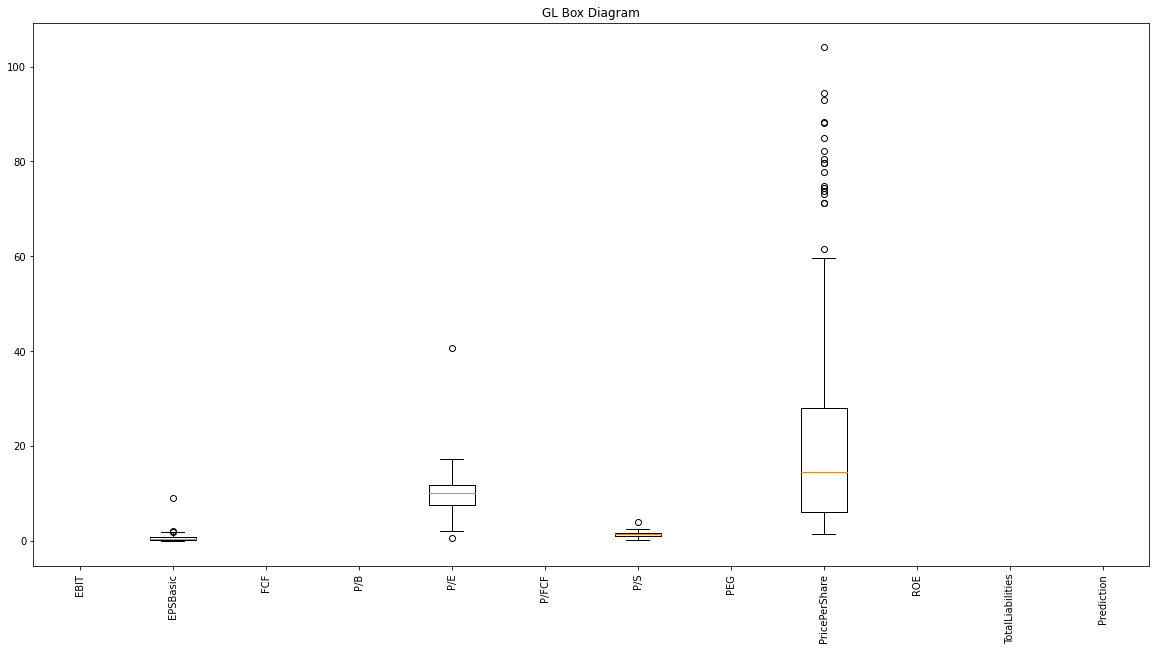

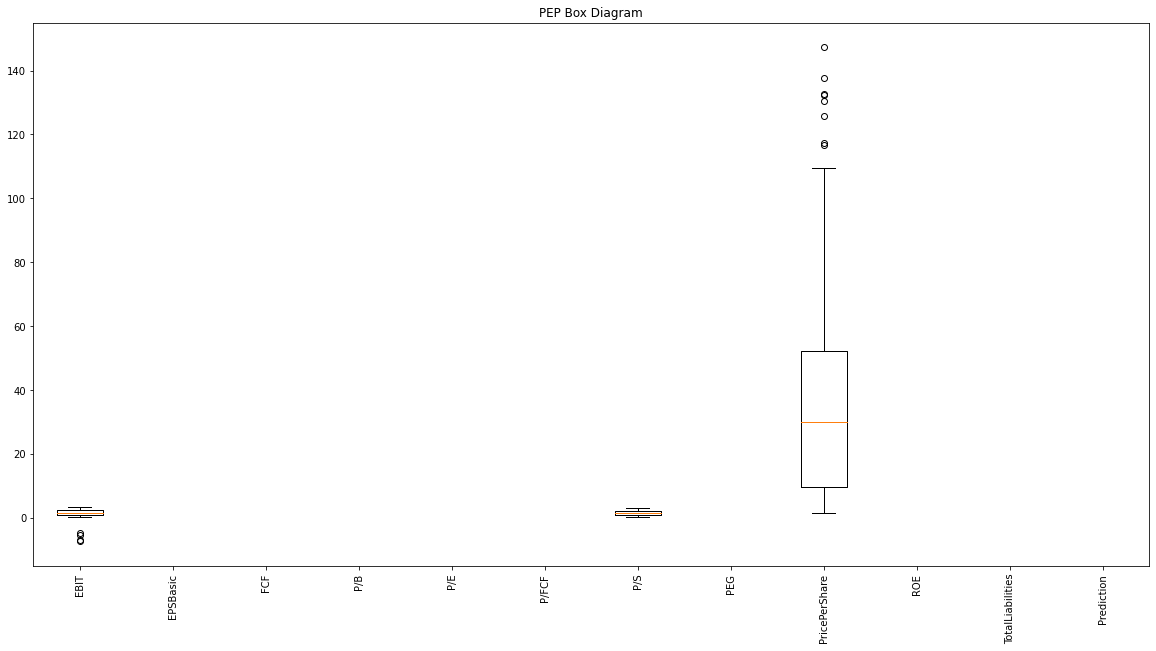

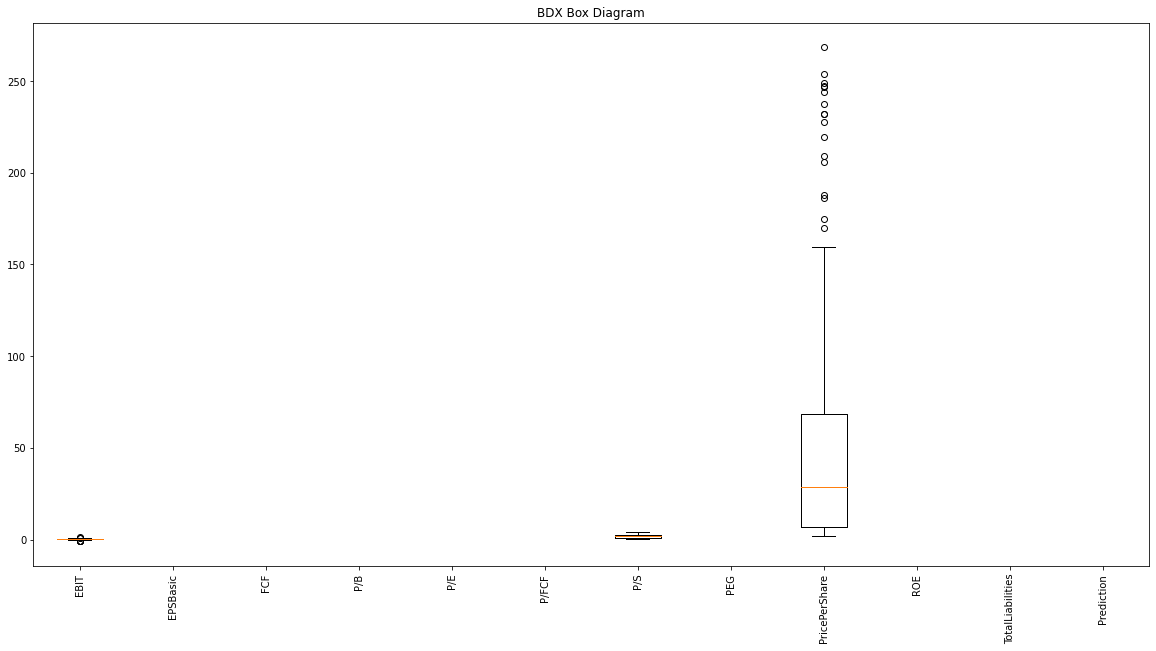

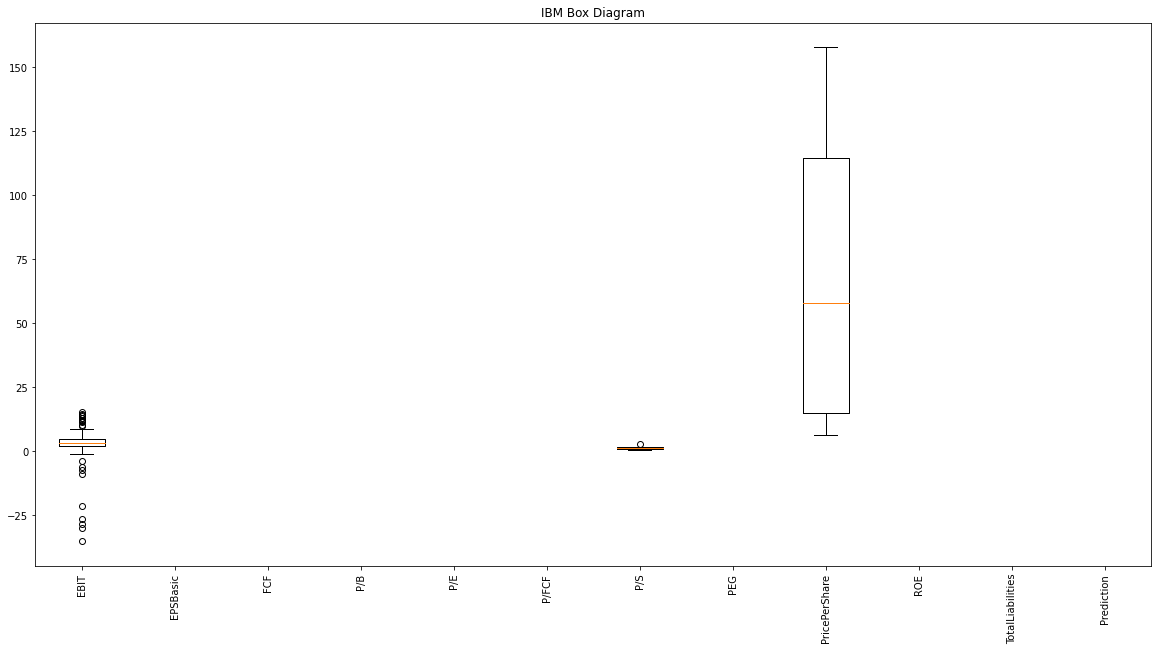

In [20]:
# Box Diagrams for numeric attributes
for stock in stock_sel:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    ax1.set_title(stock+' Box Diagram')
    ax1.boxplot(data.xs(stock, level=1, axis=1), labels=data.xs(stock, level=1, axis=1).columns)
    plt.xticks(rotation=90)
    plt.show()

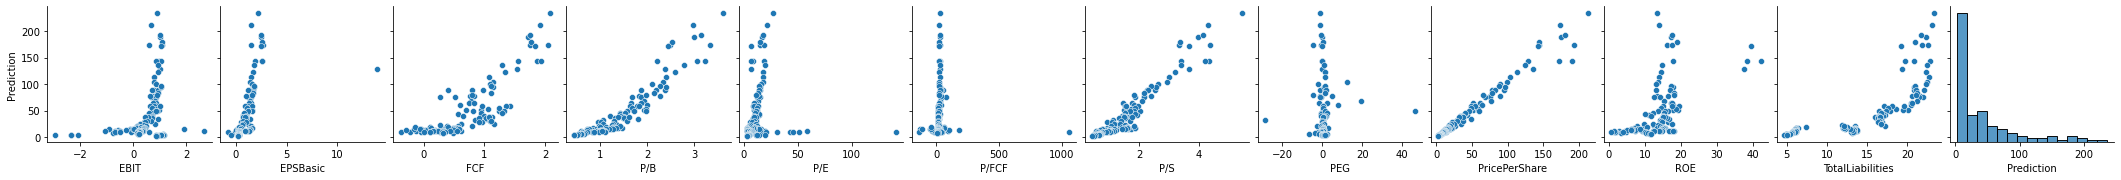

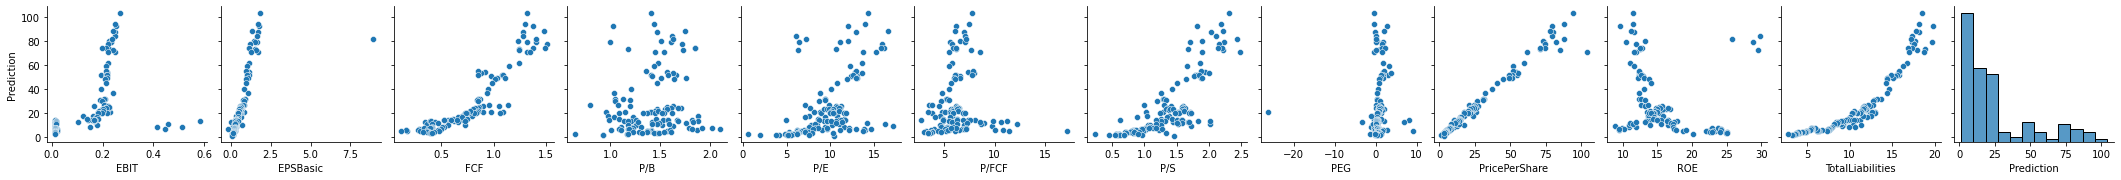

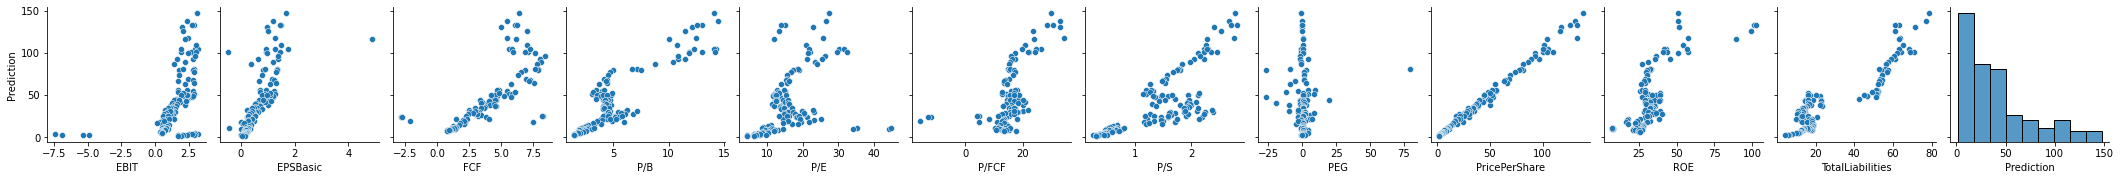

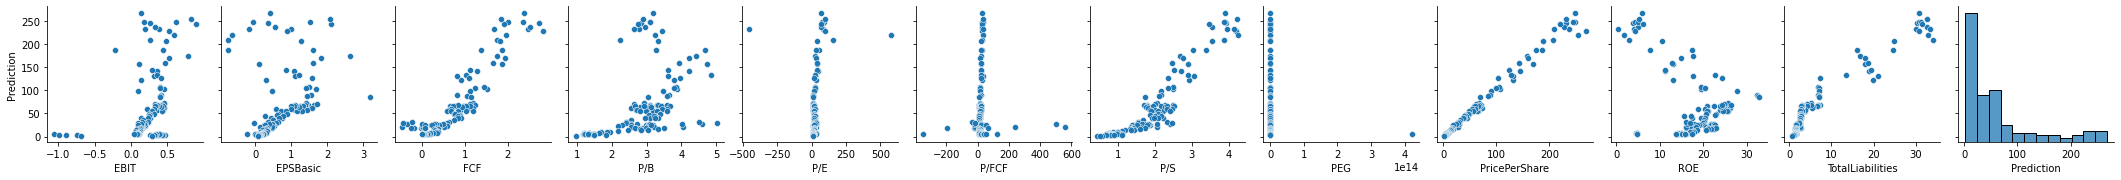

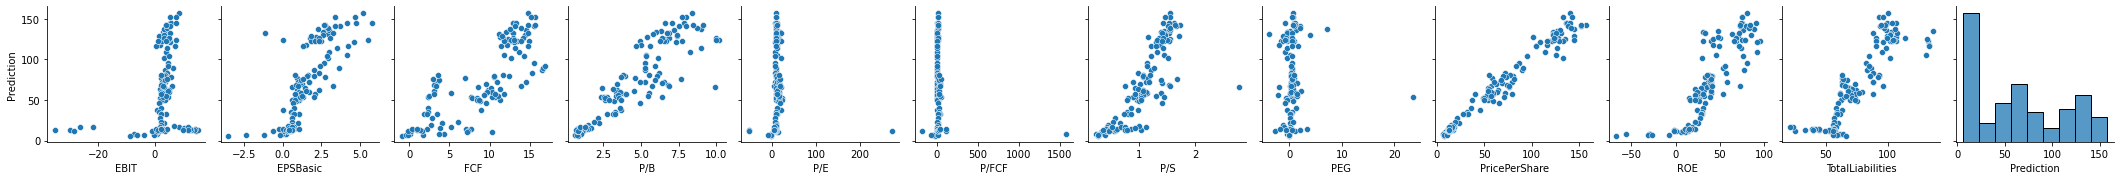

In [21]:
# Data visualization of features against dependent variable
for stock in stock_sel:
    sbn.pairplot(data.xs(stock, level=1, axis=1), y_vars=['Prediction'], kind="scatter")
    plt.show()

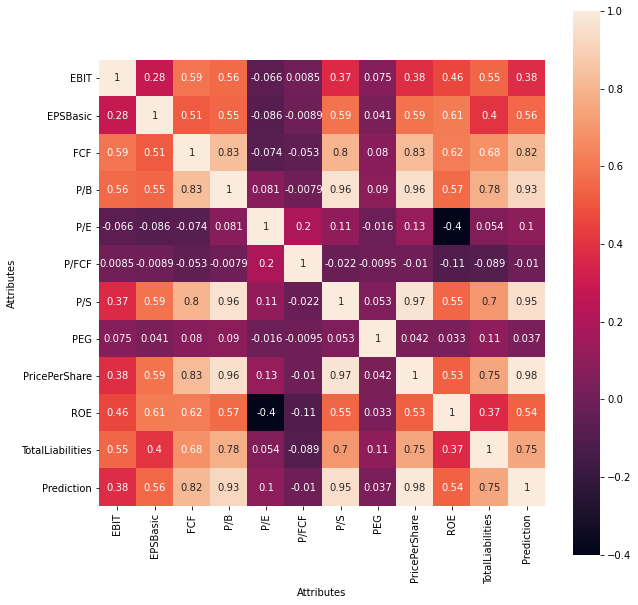

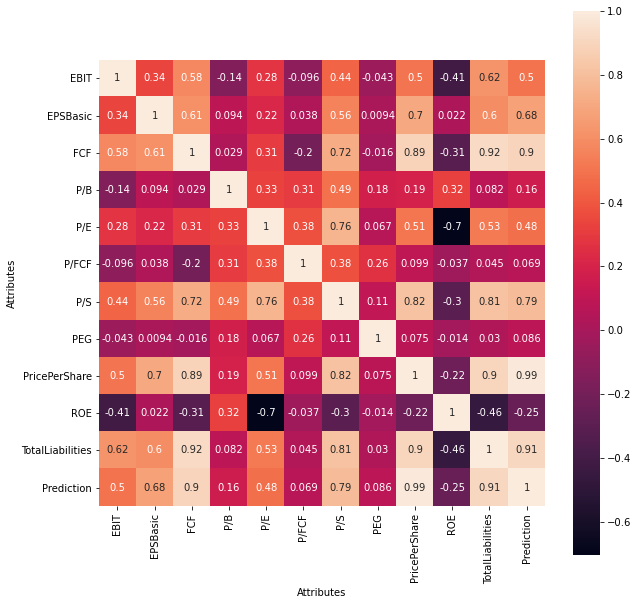

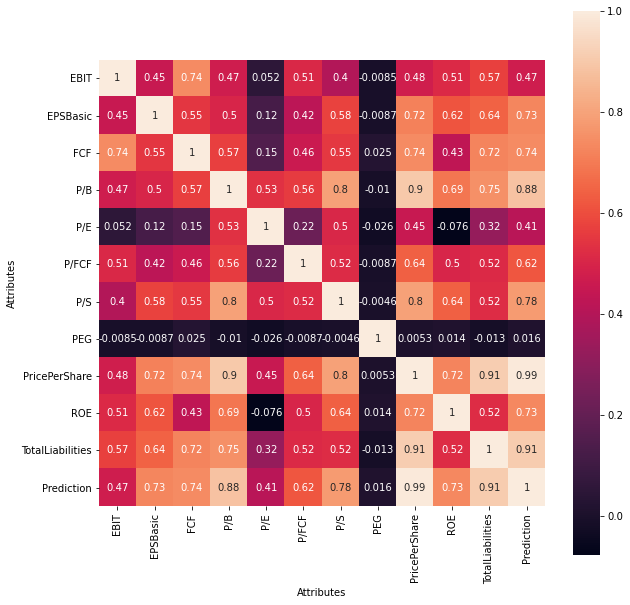

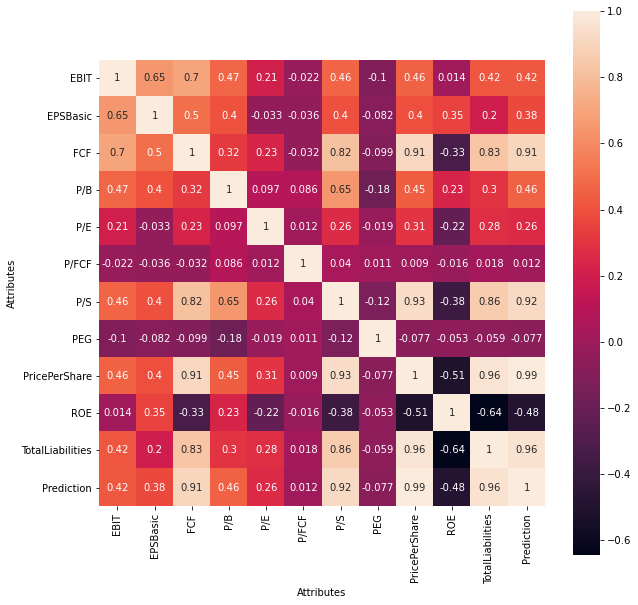

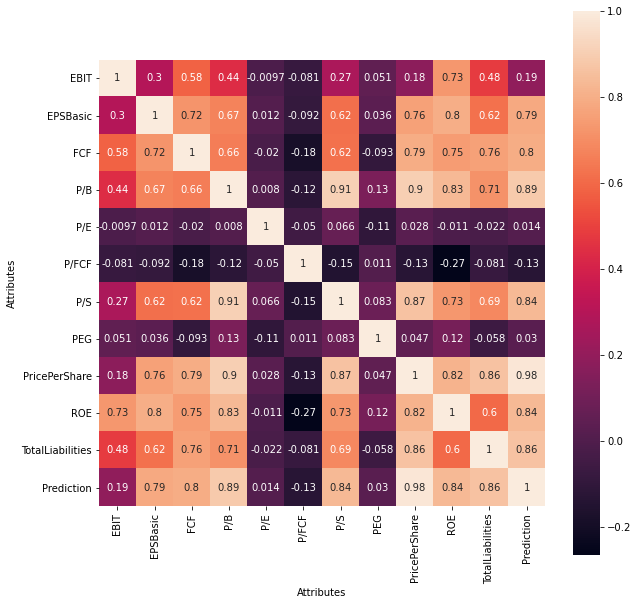

In [22]:
# Heat map of co-relation between numeric attributes
for stock in stock_sel:
    fig, ax = plt.subplots(figsize=(10,10))
    sbn.heatmap(data.xs(stock, level=1, axis=1).corr(), square=True, annot=True, ax=ax)

<AxesSubplot:>

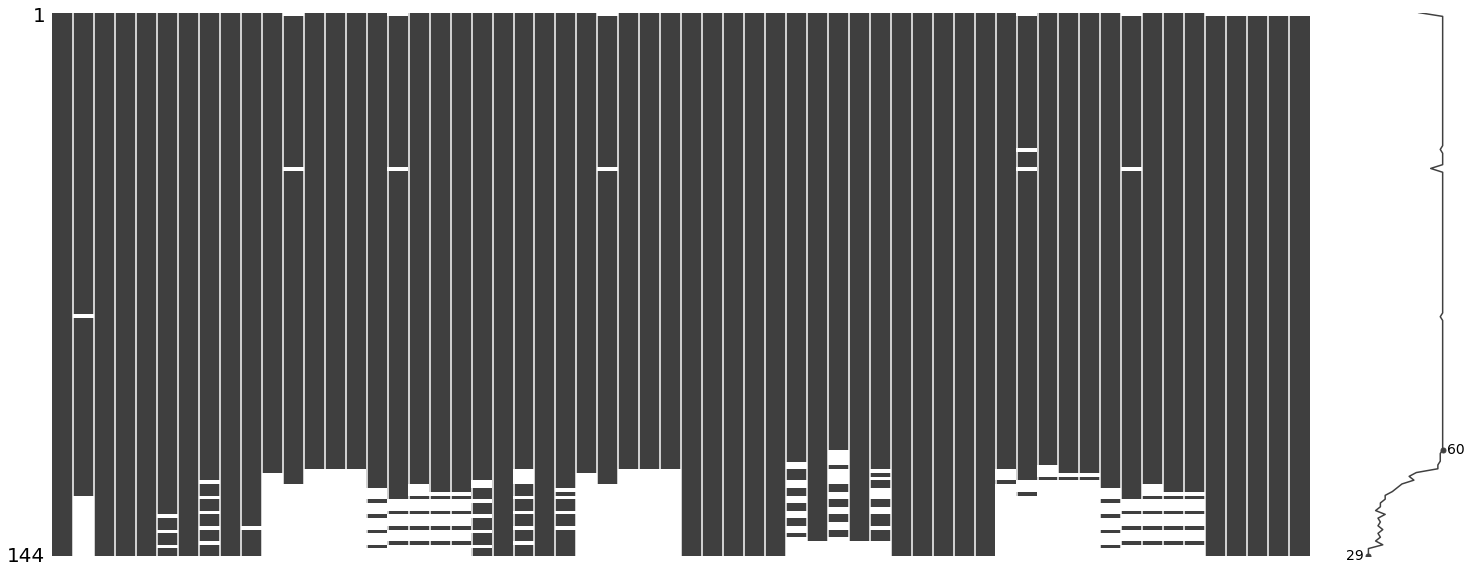

In [23]:
import missingno as msno
msno.matrix(data)

### 1.2.1 Observations
- Se pueden observar una acumlación de valores nulos en los primeros periodos
- Las correlaciones entre acciones son bastante variables (es posible que se deba a datos nulos)
- Se observan patrones en las gráficas, los cuales pueden indicar que existen patrones capaces de aprender por parte del modelo.

## 1.3 Data Cleansing

In [11]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data = pd.read_csv(PATH+'manual_features_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
include = ['P/E', 'PEG', 'FCF', 'P/FCF', 'P/S', 'P/B', 'ROE', 'EPSBasic', 'EBIT', 'TotalLiabilities', 'PricePerShare', 'Prediction', 'QMonth']
#include += ['EPSDiluted', 'EPSDiluted(TTM)', 'CashfromOperations', 'CashfromOperations(TTM)', 'NetChangeinCapitalExpenditures', 'NetChangeinCapitalExpenditures(TTM)', 'Revenue', 'Revenue(TTM)', 'NetIncome', 'NetIncome(TTM)', 'PricePerShare', 'TotalAssets', 'TotalLiabilities', 'AverageBasicSharesOutstanding', ]
data.drop(list(set(data.columns.get_level_values(0)) - set(include)), level=0, axis=1, inplace=True)
data

Attributes     EBIT                                  EPSBasic                 \
Symbol          BDX       GL     IBM     NSC     PEP      BDX      GL    IBM   
2021-03     0.42900  0.23997   1.185  1.0220  2.4320   0.9500  1.7300  1.070   
2020-12     1.27500  0.27139   1.606  1.0270  2.6960   3.3800  1.9600  1.520   
2020-09     0.26600  0.25321   2.150  0.8790  3.0970   0.3600  1.7800  1.900   
2020-06     0.38300  0.23505   1.894  0.6590  2.4030   0.9800  1.6300  1.530   
2020-03     0.33400  0.22373   0.277  0.5900  2.0010   0.5300  1.5400  1.320   
2019-12     0.53000  0.24759   4.347  0.9800  2.4920   0.8800  1.7300  4.140   
2019-09     0.13900  0.26842   1.954  1.0180  2.8930   0.4100  1.8500  1.890   
2019-06     0.61600  0.25019   3.116  1.0870  2.7900   1.5300  1.7000  2.820   
2019-03     0.17400  0.24938   2.093  1.0100  2.0720  -0.0700  1.6800  1.790   
2018-12     0.89700  0.22724   4.627  1.0780  2.2500   2.0900  1.4800  2.170   
2018-09     0.59500  0.24276   3.187  1.0500  2.9990  -0.6400  1.5900  2.950   
2018-06     0.82900  0.24928   2.949  1.0550  3.2080   2.0800  1.6300  2.630   
2018-03     0.19100  0.23446   1.301  0.8430  1.9510  -0.1900  1.5200  1.820   
2017-12     0.26300  0.23808   4.633  1.0270  2.6960  -0.7600  8.9300 -1.140   
2017-09     0.48300  0.24158   3.233  0.9340  3.0450   1.2700  1.3200  2.930   
2017-06    -0.22000  0.22308   2.590  0.9200  3.0390  -0.7500  1.2000  2.490   
2017-03     0.44800  0.21244   1.559  0.7970  1.9730   1.6100  1.1300  1.860   
2016-12     0.78700  0.19647   5.142  0.7830  2.4250   2.6400  1.1400  4.740   
2016-09     0.10400  0.22184   3.421  0.8490  2.8510   0.0900  1.2700  2.990   
2016-06     0.51900  0.22245   3.216  0.7740  2.9860   1.8300  1.1500  2.620   
2016-03     0.47500  0.21482   1.181  0.7390  1.6330   1.5900  1.0200  2.090   
2015-12     0.36300  0.19520   5.227  0.6700  2.2680   1.0800  1.0800  4.600   
2015-09     0.28900  0.21826   3.738  0.8610  1.4180   0.8600  1.1700  3.030   
2015-06     0.14400  0.21584   4.339  0.8330  2.9140   0.3000  1.0100  3.510   
2015-03     0.31600  0.21354   3.109  0.6270  1.8120   1.1000  0.9600  2.360   
2014-12     0.36100  0.21528   7.212  0.9310  2.0650   1.2200  1.1400  5.540   
2014-09     0.41300  0.21608   4.487  1.0300  2.8700   1.5600  1.0200  0.020   
2014-06     0.45600  0.21285   5.484  1.0370  2.9140   1.6900  1.0000  4.140   
2014-03     0.39600  0.21659   3.288  0.6930  1.8170   1.4800  1.0000  2.300   
2013-12     0.39300  0.21770   7.215  0.9320  2.4330   1.4000  1.0600  5.770   
2013-09     0.09400  0.21053   5.069  0.8790  2.7970   0.4600  0.9700  3.700   
2013-06     0.41400  0.21361   4.242  0.8650  2.8870   1.5500  0.9700  2.930   
2013-03     0.39500  0.19394   3.700  0.8260  1.6850   1.4200  0.8533  2.720   
2012-12     0.40100  0.24194   8.578  0.7590  2.2570   3.1800  1.0570  5.190   
2012-09     0.39712  0.20863   5.198  0.7640  2.8230   1.4500  0.9133  3.360   
2012-06     0.45339  0.20603   5.278  0.9650  2.3780   1.6200  0.8867  3.380   
2012-03     0.40466  0.18991   3.946  0.7740  1.7450   1.4100  0.7933  2.650   
2011-12     0.35182  0.19662   7.387  0.8420  2.2710   1.2300  0.8067  4.680   
2011-09     0.41630  0.20963   5.134  0.9980  2.9060   1.3900  0.8333  3.230   
2011-06     0.45738  0.22846   4.982  0.9090  2.7740   1.5700  0.8600  3.040   
2011-03     0.45238  0.16698   3.910  0.6270  1.7430   1.4100  0.5733  2.340   
2010-12     0.42370  0.20647   7.057  0.6930  2.2800   1.3900  0.7600  4.240   
2010-09     0.33198  0.22710   4.772  0.8270  2.8280   1.7100  0.6333  2.860   
2010-06     0.42646  0.19953   4.665  0.7500  2.4720   1.3200  0.4533  2.650   
2010-03     0.42346  0.19299   3.616  0.5750  1.5550   1.2600  0.6533  2.000   
2009-12     0.43610  0.18066   6.462  0.5860  2.1320   1.3300  0.6067  3.650   
2009-09     0.39004  0.16410   4.457  0.5990  2.3940   1.3200  0.5422  2.440   
2009-06     0.44028  0.17532   4.363  0.5040  2.3370   1.4200  0.6133  2.340   


In [12]:
# Replace inf values by nan
data.replace(np.inf, np.nan, inplace=True)
# Fill None values with the previous valid value
data.fillna(method='ffill', axis=0, inplace=True)
data.fillna(method='bfill', axis=0, inplace=True)
#data.drop(['2021-03'], axis=0, inplace=True)
#data.drop(['2020-12'], axis=0, inplace=True)
data

Attributes     EBIT                                  EPSBasic                 \
Symbol          BDX       GL     IBM     NSC     PEP      BDX      GL    IBM   
2021-03     0.42900  0.23997   1.185  1.0220  2.4320   0.9500  1.7300  1.070   
2020-12     1.27500  0.27139   1.606  1.0270  2.6960   3.3800  1.9600  1.520   
2020-09     0.26600  0.25321   2.150  0.8790  3.0970   0.3600  1.7800  1.900   
2020-06     0.38300  0.23505   1.894  0.6590  2.4030   0.9800  1.6300  1.530   
2020-03     0.33400  0.22373   0.277  0.5900  2.0010   0.5300  1.5400  1.320   
2019-12     0.53000  0.24759   4.347  0.9800  2.4920   0.8800  1.7300  4.140   
2019-09     0.13900  0.26842   1.954  1.0180  2.8930   0.4100  1.8500  1.890   
2019-06     0.61600  0.25019   3.116  1.0870  2.7900   1.5300  1.7000  2.820   
2019-03     0.17400  0.24938   2.093  1.0100  2.0720  -0.0700  1.6800  1.790   
2018-12     0.89700  0.22724   4.627  1.0780  2.2500   2.0900  1.4800  2.170   
2018-09     0.59500  0.24276   3.187  1.0500  2.9990  -0.6400  1.5900  2.950   
2018-06     0.82900  0.24928   2.949  1.0550  3.2080   2.0800  1.6300  2.630   
2018-03     0.19100  0.23446   1.301  0.8430  1.9510  -0.1900  1.5200  1.820   
2017-12     0.26300  0.23808   4.633  1.0270  2.6960  -0.7600  8.9300 -1.140   
2017-09     0.48300  0.24158   3.233  0.9340  3.0450   1.2700  1.3200  2.930   
2017-06    -0.22000  0.22308   2.590  0.9200  3.0390  -0.7500  1.2000  2.490   
2017-03     0.44800  0.21244   1.559  0.7970  1.9730   1.6100  1.1300  1.860   
2016-12     0.78700  0.19647   5.142  0.7830  2.4250   2.6400  1.1400  4.740   
2016-09     0.10400  0.22184   3.421  0.8490  2.8510   0.0900  1.2700  2.990   
2016-06     0.51900  0.22245   3.216  0.7740  2.9860   1.8300  1.1500  2.620   
2016-03     0.47500  0.21482   1.181  0.7390  1.6330   1.5900  1.0200  2.090   
2015-12     0.36300  0.19520   5.227  0.6700  2.2680   1.0800  1.0800  4.600   
2015-09     0.28900  0.21826   3.738  0.8610  1.4180   0.8600  1.1700  3.030   
2015-06     0.14400  0.21584   4.339  0.8330  2.9140   0.3000  1.0100  3.510   
2015-03     0.31600  0.21354   3.109  0.6270  1.8120   1.1000  0.9600  2.360   
2014-12     0.36100  0.21528   7.212  0.9310  2.0650   1.2200  1.1400  5.540   
2014-09     0.41300  0.21608   4.487  1.0300  2.8700   1.5600  1.0200  0.020   
2014-06     0.45600  0.21285   5.484  1.0370  2.9140   1.6900  1.0000  4.140   
2014-03     0.39600  0.21659   3.288  0.6930  1.8170   1.4800  1.0000  2.300   
2013-12     0.39300  0.21770   7.215  0.9320  2.4330   1.4000  1.0600  5.770   
2013-09     0.09400  0.21053   5.069  0.8790  2.7970   0.4600  0.9700  3.700   
2013-06     0.41400  0.21361   4.242  0.8650  2.8870   1.5500  0.9700  2.930   
2013-03     0.39500  0.19394   3.700  0.8260  1.6850   1.4200  0.8533  2.720   
2012-12     0.40100  0.24194   8.578  0.7590  2.2570   3.1800  1.0570  5.190   
2012-09     0.39712  0.20863   5.198  0.7640  2.8230   1.4500  0.9133  3.360   
2012-06     0.45339  0.20603   5.278  0.9650  2.3780   1.6200  0.8867  3.380   
2012-03     0.40466  0.18991   3.946  0.7740  1.7450   1.4100  0.7933  2.650   
2011-12     0.35182  0.19662   7.387  0.8420  2.2710   1.2300  0.8067  4.680   
2011-09     0.41630  0.20963   5.134  0.9980  2.9060   1.3900  0.8333  3.230   
2011-06     0.45738  0.22846   4.982  0.9090  2.7740   1.5700  0.8600  3.040   
2011-03     0.45238  0.16698   3.910  0.6270  1.7430   1.4100  0.5733  2.340   
2010-12     0.42370  0.20647   7.057  0.6930  2.2800   1.3900  0.7600  4.240   
2010-09     0.33198  0.22710   4.772  0.8270  2.8280   1.7100  0.6333  2.860   
2010-06     0.42646  0.19953   4.665  0.7500  2.4720   1.3200  0.4533  2.650   
2010-03     0.42346  0.19299   3.616  0.5750  1.5550   1.2600  0.6533  2.000   
2009-12     0.43610  0.18066   6.462  0.5860  2.1320   1.3300  0.6067  3.650   
2009-09     0.39004  0.16410   4.457  0.5990  2.3940   1.3200  0.5422  2.440   
2009-06     0.44028  0.17532   4.363  0.5040  2.3370   1.4200  0.6133  2.340   


## 1.4 Data Transformation

In [13]:
data.drop(['EBIT', 'EPSBasic', 'TotalLiabilities'], level=0, axis=1, inplace=True)
data.drop(['P/FCF', 'P/E', 'PEG', 'P/B', 'P/S'], level=0, axis=1, inplace=True)
#data.drop(['P/FCF', 'P/E', 'PEG', 'PricePerShare'], level=0, axis=1, inplace=True)

In [14]:
data.to_csv(PATH+'manual_features_dataset_cleaned.csv')

In [15]:
data = pd.read_csv(PATH+'manual_features_dataset_cleaned.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

Attributes      FCF                                   PricePerShare  \
Symbol          BDX        GL     IBM     NSC     PEP           BDX   
2021-03     4.15000  1.456735  15.519  2.3040  6.4160    243.149994   
2020-12     3.47600  1.434669  14.967  2.1430  6.3730    249.376114   
2020-09     2.72900  1.371369  12.650  2.0840  6.3620    231.094086   
2020-06     2.47500  1.405849  12.126  1.9230  5.4700    236.837173   
2020-03     2.51000  1.239639  11.492  2.0480  4.9710    226.691345   
2019-12     2.83400  1.321670  11.863  1.8730  5.4170    267.439453   
2019-09     2.37300  1.322700  12.327  1.7200  6.0830    247.992310   
2019-06     2.35900  1.299744  12.736  1.7580  6.2120    246.324951   
2019-03     2.00800  1.278395  11.741  1.7560  7.0070    243.311157   
2018-12     1.90600  1.232550  11.283  1.7750  6.1330    218.848572   
2018-09     1.97000  1.246356  12.741  1.9380  5.6020    252.694611   
2018-06     1.83700  1.275586  12.053  1.8270  5.8300    231.261536   
2018-03     1.68200  1.322423  13.479  1.5550  5.9100    208.515976   
2017-12     1.76200  1.408785  12.951  1.5300  7.0610    205.270615   
2017-09     1.82300  1.484159  11.171  1.2890  6.9780    187.260498   
2017-06     1.37300  1.506332  11.785  1.3400  6.8080    185.774536   
2017-03     1.87200  1.493473  11.582  1.0740  7.1970    173.998520   
2016-12     1.74100  1.373552  12.934  1.1470  7.6230    156.406067   
2016-09     1.86600  1.345658  14.522  1.1000  8.0520    169.050446   
2016-06     1.94400  1.241126  14.489  0.4080  8.3650    158.921097   
2016-03     1.65000  1.146308  14.894  0.7650  8.0220    141.716629   
2015-12     1.29000  1.083097  13.104  0.5230  8.1060    143.197021   
2015-09     1.13300  0.914656  13.657  0.2610  7.8060    122.752365   
2015-06     0.90300  0.876140  13.241  0.7840  7.8250    130.494919   
2015-03     0.81400  0.849218  12.960  0.8290  7.8210    131.715973   
2014-12     1.02600  0.845343  12.685  0.7970  7.6470    127.139984   
2014-09     1.09100  0.971254  13.033  1.1400  6.8810    103.531273   
2014-06     1.51000  1.027113  12.923  1.1130  6.5400    107.111969   
2014-03     1.44000  1.088372  12.540  0.9700  6.3200    105.522766   
2013-12     1.22900  1.108112  13.345  1.1070  6.8930     99.116508   
2013-09     1.13100  1.011135  13.179  0.8040  7.2210     89.267258   
2013-06     0.83119  0.984097  13.946  0.7510  7.5230     87.762924   
2013-03     1.05471  0.944117  14.845  0.5940  7.1700     84.476250   
2012-12     1.14836  0.938173  14.869  0.8240  5.7650     68.701378   
2012-09     1.20900  0.866335  15.592  0.6900  5.4420     68.584991   
2012-06     1.14509  0.847192  15.725  0.9500  4.8290     64.875282   
2012-03     1.00304  0.838366  15.726  1.4220  4.6520     66.974396   
2011-12     0.94805  0.854084  15.179  1.0670  5.6050     64.062828   
2011-09     1.11701  0.958859  14.776  1.3540  5.8490     62.480827   
2011-06     1.12671  0.898313  14.190  1.2430  5.7430     73.047302   
2011-03     1.19007  1.049217  13.909  0.9610  6.0750     67.170044   
2010-12     1.22852  1.135725  14.795  1.2440  5.1950     70.935684   
2010-09     1.11815  1.135725  14.256  1.3260  4.6210     61.877090   
2010-06     1.18853  1.085140  15.522  1.2970  4.4850     56.170162   
2010-03     1.18069  1.056271  16.603  0.9520  4.2990     65.053627   
2009-12     1.13283  0.969611  16.696  0.5610  4.6680     64.854340   
2009-09     1.02203  0.699349  16.968  0.6420  4.5590     57.086571   
2009-06     0.87804  0.661184  15.356  0.8520  4.0130     58.084206   
2009-03     0.88935  0.708551  14.561  0.9680  3.7780     54.501385   
2008-12     0.83570  0.720800  13.925  1.1570  4.5530     55.147465   
2008-09     1.03611  0.793093  11.865  1.0470  3.8530     64.379669   
2008-06     0.93573  0.817870  12.440  0.8120  4.5260     64.997208   
2008-03     0.78111  0.810442  11.693  0.9420  4.3560     68.402344   
2007-12     0.83998  0.825838  10.584  0.9920  4.5040     66.381210   
2007-09     0.66172  0.8

In [16]:
X = data.drop(['Prediction'], level=0, axis=1)
y = data['Prediction']
display(X.shape, y.shape)

(145, 15)

(145, 5)

In [17]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['Prediction'] = y[stockName].values
    return df

def dfMn(stockName, X):
    Xsc = X.xs(stockName, level=1, axis=1)
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['Prediction'] = y[stockName].values
    return df

In [18]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
dfsM = {}
for stock in stock_sel:
    dfsM[stock] = dfMn(stock, X)
dfsM

{'NSC': Attributes     FCF  PricePerShare        ROE  Prediction
 2021-03     2.3040     267.593750  15.454241  267.593750
 2020-12     2.1430     235.838409  13.406593  267.593750
 2020-09     2.0840     211.490265  13.276033  235.838409
 2020-06     1.9230     172.674225  13.885393  211.490265
 2020-03     2.0480     142.789413  16.039669  172.674225
 2019-12     1.8730     189.026276  17.756034  142.789413
 2019-09     1.7200     174.047775  17.345912  189.026276
 2019-06     1.7580     192.127335  17.667822  174.047775
 2019-03     1.7560     179.363022  17.614389  192.127335
 2018-12     1.7750     142.781494  18.988604  179.363022
 2018-09     1.9380     171.520721  42.160625  142.781494
 2018-06     1.8270     142.687317  39.449794  171.520721
 2018-03     1.5550     127.766441  38.314256  142.687317
 2017-12     1.5300     135.697540  37.593043  127.766441
 2017-09     1.2890     123.268616  14.821929  135.697540
 2017-06     1.3400     112.828415  14.517685  123.268616
 2017-0

## 1.5 Data Visualization

In [30]:
dfsM['IBM']

Attributes,FCF,PricePerShare,ROE,Prediction
2020-12,14.967,122.847458,28.781870,131.787506
2020-09,12.650,117.041725,40.414216,122.847458
2020-06,12.126,114.674469,42.241287,117.041725
2020-03,11.492,103.937202,48.663968,114.674469
2019-12,11.863,124.292496,46.106087,103.937202
2019-09,12.327,133.270859,41.970068,124.292496
2019-06,12.736,124.907394,48.454924,133.270859
2019-03,11.741,126.305580,50.314502,124.907394
2018-12,11.283,100.579742,47.571545,126.305580
2018-09,12.741,132.114014,29.742657,100.579742


'NSC'

'GL'

'PEP'

'BDX'

'IBM'

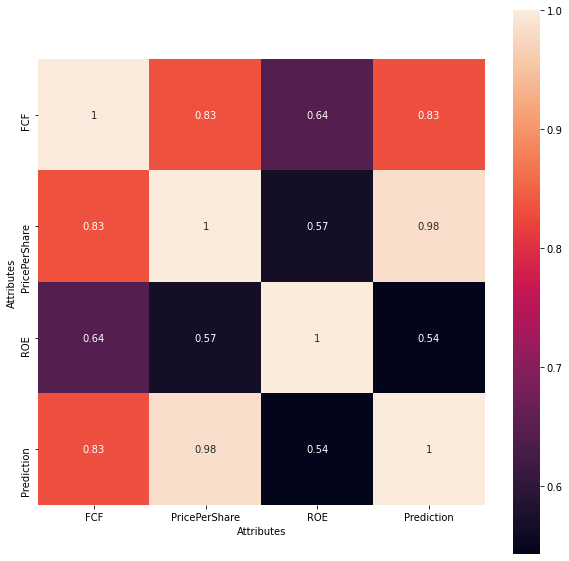

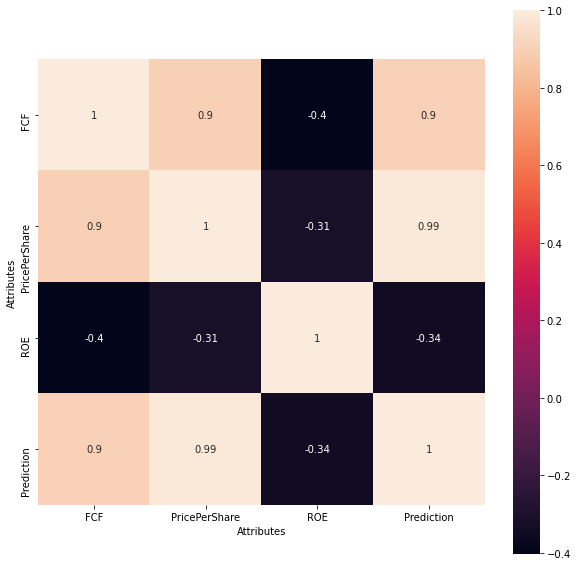

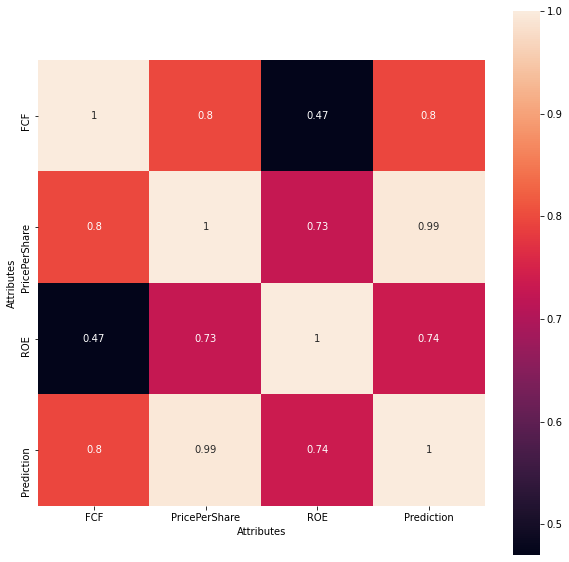

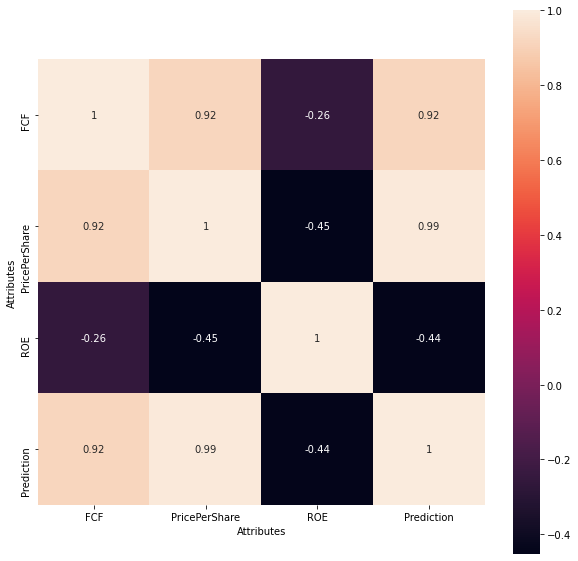

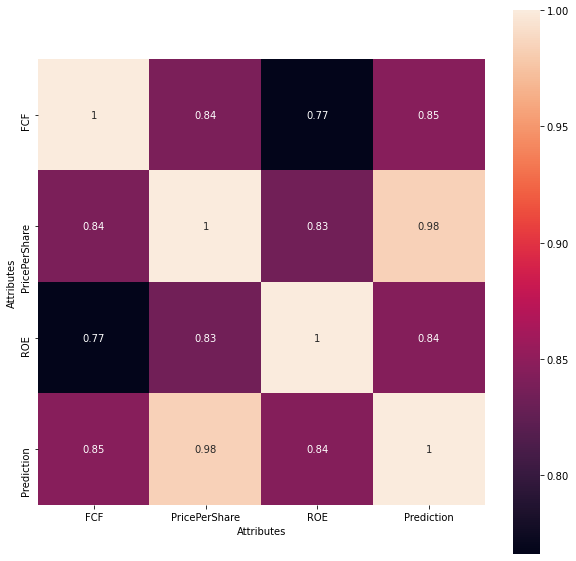

In [35]:
# Heat map of co-relation between numeric attributes
for stock in stock_sel:
    fig, ax = plt.subplots(figsize=(10,10))
    display(stock)
    sbn.heatmap(dfsM[stock].corr(), square=True, annot=True, ax=ax)

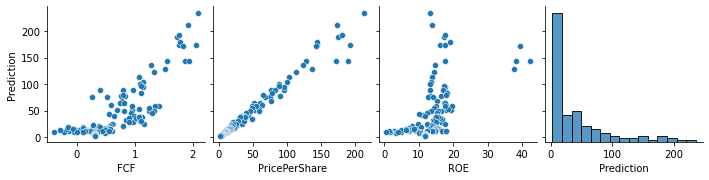

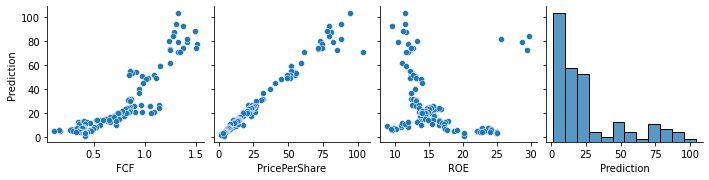

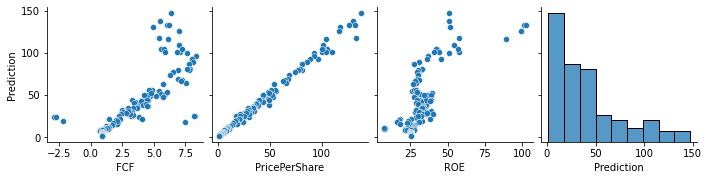

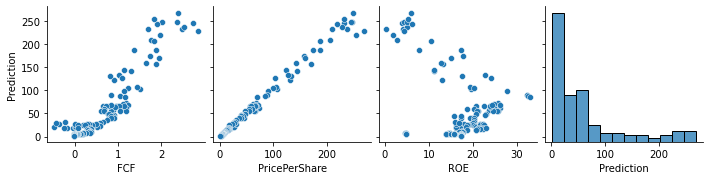

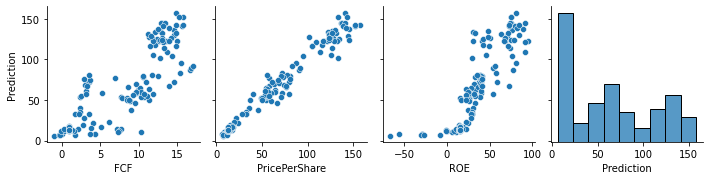

In [36]:
for stock in stock_sel:
    sbn.pairplot(dfsM[stock], y_vars=['Prediction'], kind="scatter")
    plt.show()

In [19]:
for stock in stock_sel:
    #dfsM[stock].to_csv(PATH+'{}_Manual_dataset.csv'.format(stock))
    dfsM[stock].to_csv(PATH+'updated/{}_Manual_dataset.csv'.format(stock))